# KCON 2019 THAILAND
***KCON คืออะไร?<br>***
- เป็นเทศกาลดนตรี K-Pop (เค-ป็อป) ซึ่งภายในงานอัดแน่นไปด้วยไลน์อัพศิลปินดังระดับท็อป และกิจกรรมที่การันตีว่าจะทำให้แฟนเพลงได้ใกล้ชิดศิลปินมากขึ้น
- ปี 2019 เป็นครั้งที่สองที่มีการจัดงาน KCON ภายในประเทศไทย


![an artist who join "KCON Thailand 2019"](img\header.png)

# Import Library

In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import pytz
# import deepcut
from datetime import datetime, timezone
from pythainlp import word_tokenize
from pythainlp.corpus.common import thai_stopwords

# Read data (collect on 28/09/2019 - 29/09/2019)

***Warning!*** : Takes quite a long time to run cell below, depend on file size.

In [57]:
def read_data(tweets_data_path):
    """ Function read data. """
    tweets_data = []
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    tweets_file.close()
    return tweets_data

In [58]:
# Combine data into a list tweets_data.
tweets_data = read_data('data/06-09-62.txt')
# tweets_data = read_data('data/07-09-62-1.txt')
# tweets_data += read_data('data/07-09-62-2.txt')

In [59]:
print(len(tweets_data)) # count number of twitter from collecting data.

7106


# - - - - - Data preparation - - - - -

## Reformat time and convert time zones UTC To ICT

In [60]:
thai_tz = pytz.timezone('Asia/Bangkok') # thai time zone

In [61]:
# find error in data
lst_error = []
for i in range(len(tweets_data)):
    try:
        tweets_data[i]['created_at'].split(' ')
    except:
        lst_error.append(i)

In [62]:
print(lst_error)
print('----------')
print(len(lst_error))

[]
----------
0


In [63]:
for i in range(len(tweets_data)):
    if i not in lst_error:
        lst = tweets_data[i]['created_at'].split(' ')
        date = (lst[5]+'.'+lst[1]+'.'+lst[2]+' '+lst[3])
        date_time = datetime.strptime(date, '%Y.%b.%d %H:%M:%S')
        tweets_data[i]['created_at'] =  date_time.replace(tzinfo=timezone.utc).astimezone(thai_tz) # reset info and convert to thai timezone

In [64]:
time = [tweets_data[i]['created_at'] for i in range(len(tweets_data)) if i not in lst_error]
language = [tweets_data[i]['lang'] for i in range(len(tweets_data)) if i not in lst_error]

## Create Data frame

In [65]:
df = pd.DataFrame({'time':time, 'language':language})

## Time binning

- Divide the time into 12 bin ( 2 hours / bin )

In [66]:
# bins = list(range(0, 25*3600, 2*3600)) # Divide the time into 12 bin ( 2 hours / bin )
# labels = ['0-2', '2-4', '4-6', '6-8',
#           '8-10', '10-12', '12-14', '14-16',
#           '16-18', '18-20', '20-22', '22-24'] # set label
# # print(list(range(0, 25, 2)))
# # bins

- Divide the time into 24 bin ( 1 hours / bin )

In [67]:
bins = list(range(0, 25*3600, 1*3600)) # Divide the time into 24 bin ( 1 hours / bin )
labels = ['0 pm','1 am','2 am','3 am','4 am',
          '5 am','6 am','7 am','8 am','9 am',
          '10 am','11 am','12 am','13 pm','14 pm',
         '15 pm','16 pm','17 pm','18 pm','19 pm',
          '20 pm','21 pm','22 pm','23 pm'] # set label
# print(list(range(0, 25, 2)))
# bins

In [68]:
df['sec'] = df.time.dt.hour * 3600 + df.time.dt.minute*60 + df.time.dt.second # convert time unit to second.
df['group'] = pd.cut(df['sec'], bins=bins, labels=labels) # set bin label into group column.

In [69]:
df.head()

,time,language,sec,group
0,2019-09-06 03:07:06+07:00,th,11226,3 am
1,2019-09-06 03:07:31+07:00,en,11251,3 am
2,2019-09-06 03:08:03+07:00,en,11283,3 am
3,2019-09-06 03:08:12+07:00,en,11292,3 am
4,2019-09-06 03:08:15+07:00,en,11295,3 am


In [70]:
df.tail()

,time,language,sec,group
7101,2019-09-07 08:14:02+07:00,th,29642,8 am
7102,2019-09-07 08:14:09+07:00,ja,29649,8 am
7103,2019-09-07 08:15:45+07:00,th,29745,8 am
7104,2019-09-07 08:15:55+07:00,th,29755,8 am
7105,2019-09-07 08:16:25+07:00,th,29785,8 am


## Hashtag

In [71]:
hashtag = []
for j in range(len(tweets_data)):
    if j not in lst_error: # ensure that message, not in the list of error.
        for i in range(len(tweets_data[j]['entities']['hashtags'])): # access to hashtag value
            hashtag.append(tweets_data[j]['entities']['hashtags'][i]['text'].upper()) # append hashtag into hashtag list
#             print(tweets_data[j]['entities']['hashtags'][i]['text'])

In [72]:
hashtag_str = ''
for i in hashtag:
    hashtag_str += i+' '

In [73]:
len(hashtag)

14405

***monitor all hashtag***

In [74]:
hashtag_df = pd.DataFrame({'hashtag':hashtag})
hashtag_df['hashtag'].value_counts().head(50)

KCON2019THAILAND            4325
X1                          1317
AB6IX                        900
KCON2019                     805
MARKETERK                    794
MCDXKCON                     794
KCON19TH                     640
แจก                          471
KCONTHAILAND2019             398
GOT7                         384
TWITTERBLUEROOM              290
THEBOYZ                      204
STRAYKIDS                     97
HIPRAE                        96
FLASH3RDWIN                   73
KCON                          70
GOT7FANFESTINBKK              65
โปรเจคเด็กหลง                 64
EXPLORATIONINBKK              59
엑스원                           56
ตลาดนัดEXO                    45
IZONE                         41
ตลาดกัซ                       36
주학년                           36
APEACE                        35
VERIVERY                      33
ATEEZ                         33
ตลาดนัดX1                     33
KANGDANIELCOLORONMEINBKK      32
COVERSTARK                    30
XONE      

***Count hashtag related with artist***

In [75]:
boystory = re.findall("BOYSTORY", hashtag_str).count('BOYSTORY')
everglow = re.findall("EVERGLOW", hashtag_str).count('EVERGLOW')
goldenchild = re.findall("GOLDENCHILD", hashtag_str).count('GOLDENCHILD') + re.findall("GOLDEN_CHILD", hashtag_str).count('GOLDEN_CHILD')
got7 = re.findall("GOT7", hashtag_str).count('GOT7')
itzy = re.findall("ITZY", hashtag_str).count('ITZY')
kimjaehwan = re.findall("คิมแจฮวาน", hashtag_str).count('คิมแจฮวาน') + re.findall("KIMJAEHWAN", hashtag_str).count('KIMJAEHWAN')
nature = re.findall("NATURE", hashtag_str).count('NATURE')
oneus = re.findall("ONEUS", hashtag_str).count('ONEUS')
theboyz = re.findall("THEBOYZ", hashtag_str).count('THEBOYZ')
x1 = re.findall("X1", hashtag_str).count('X1') + re.findall("XONE", hashtag_str).count('XONE')
nichkhun = re.findall("NICHKHUN", hashtag_str).count('NICHKHUN') + re.findall("นิชคุณ", hashtag_str).count('นิชคุณ')
gidle = re.findall("G_I_DLE", hashtag_str).count('G_I_DLE') + re.findall("GIDLE", hashtag_str).count('GIDLE')
ab6ix = re.findall("AB6IX", hashtag_str).count('AB6IX')
ateez = re.findall("ATEEZ", hashtag_str).count('ATEEZ')
bvndit = re.findall("BVNDIT", hashtag_str).count('BVNDIT')
chungha = re.findall("CHUNGHA", hashtag_str).count('CHUNGHA')
izone = re.findall("IZONE", hashtag_str).count('IZONE')
straykids = re.findall("STRAYKIDS", hashtag_str).count('STRAYKIDS')
varivary = re.findall("VERIVERY", hashtag_str).count('VERIVERY')

In [76]:
# Prepare data to create a data frame.
artist = ['BOYSTORY', 'EVERGLOW', 'GOLDENCHILD', 'GOT7', 'ITZY', 'KIMJAEHWAN', 'NATURE', 'ONEUS', 'THEBOYZ', 'X1', 'NICHKHUN', 'G_I_DLE', 'AB6IX', 'ATEEZ', 'BVNDIT', 'CHUNGHA', 'IZONE', 'STRAYKIDS', 'VERIVERY']
hashtag_count = [boystory, everglow, goldenchild, got7, itzy, kimjaehwan, nature, oneus, theboyz, x1, nichkhun, gidle, ab6ix, ateez, bvndit, chungha, izone, straykids, varivary]

# Create a data frame artist_df.
artist_df = pd.DataFrame({'artist':artist, 'hashtag_count':hashtag_count}).set_index('artist')



## Collect each tweet message.
extract a full message from each tweet.

In [77]:
alltext = []

try: # Check error in data
    for i in range(len(tweets_data)):
        if i not in lst_error: # ensure that message, not in the list of error.
            if re.search('Microsoft PowerApps and Flow',tweets_data[i]['source']): # if tweet posted by Microsoft PowerApps, the key for access text will have only one then this condition must be checked first.
                text = tweets_data[i]['text']
                alltext.append(text)
            elif re.search('^RT' ,tweets_data[i]['text']): # check type of tweet [RT = retweet]
                if re.search('…$' ,tweets_data[i]['text']): # check the message that full message or summary message.
                    try: # in normal case
                        text = tweets_data[i]['retweeted_status']['extended_tweet']['full_text'] # access text.
                        alltext.append(text) # append to the alltext list.
#                         print(text)
#                         print('--------------------')
                    except: # in case of a full message not in key 'extended_tweet'.
                        text = tweets_data[i]['retweeted_status']['text'] # access text.
                        alltext.append(text) # append to the alltext list.
#                         print(text)
#                         print('--------------------')
                else:
                    if re.search('… https://' ,tweets_data[i]['text']): # check the text is condensed but the embedded link is unabridged.
                        text = tweets_data[i]['extended_tweet']['full_text'] # access text.
                        alltext.append(text) # append to the alltext list.
#                       print(text)
#                       print('--------------------')
                    else:
                        text = tweets_data[i]['retweeted_status']['text'] # access text.
                        alltext.append(text) # append to the alltext list.
#                     print(text)
#                     print('--------------------')
            else: # in case of normal tweets
                if re.search('… https//' ,tweets_data[i]['text']): # check the text is condensed but the embedded link is unabridged.
                    text = tweets_data[i]['extended_tweet']['full_text'] # access text.
                    alltext.append(text) # append to the alltext list.
#                     print(text)
#                     print('--------------------')
                else:
                    text = tweets_data[i]['text'] # access text.
                    alltext.append(text) # append to the alltext list.
#                     print(text)
#                     print('--------------------')
except:
    print(f'ERROR FOUND!! INDEX : {i}')

## Simple Sentiment Analysis [ Thai language only. ]

In [78]:
neg = open('data/neg.txt', encoding='utf-8') # Open files that contain negative words.
neg_list = [i.strip() for i in neg] # Create list of negative words.

In [79]:
pos = open('data/pos.txt', encoding='utf-8') # Open files that contain positive words.
pos_list = [i.strip() for i in pos] # Create list of positive words.

### Create function sentiment

This function will decide what message is positive or negative.

In [80]:
def pos_ro_neg(data):
    negative = 0
    positive = 0
    clean_text = [] # Remove stop words.
#     tokenize = deepcut.tokenize(text) # Tokenize by deepcut method, better but slower.
    tokenize = word_tokenize(data, engine='newmm') # tokenize by pythainlp mathod
# --------------------------------------------------------------------------------------
    for i in tokenize: # this loop will check stop words in message.
        if i not in list(thai_stopwords()):
            clean_text.append(i)
# --------------------------------------------------------------------------------------
    for j in clean_text: # count positive and negative words.
        if j in neg_list:
            negative += 1
        elif j in pos_list:
            positive += 1
# --------------------------------------------------------------------------------------
    if positive > negative: # Decide what message positive or negative.
#         print('positive') # check result
        return "positive"
    elif negative > positive:
#         print('negative') # check result
        return "negative"
    else:
        return "other"

***Warning!!!*** : Takes quite a long time to run cell below.
- if using 'deepcut' method it takes high CPU resource.

In [81]:
pos_neg = [] # Collect positive and negative from function decide what message is positive or negative.
for i in range(len(alltext)):
    text = alltext[i].replace("\n", "")    # prepare text (remove \n from text.)
    text = text.replace(" ", "")           # prepare text (remove ' ' from text.)
    pos_neg.append(pos_ro_neg(text))       # return positive or negative to list pos_neg.

----------

# - - - - - Visualization - - - - -

## The tweet related to "KCON2019THAILAND" by time.

Text(0, 0.5, 'number of tweets')

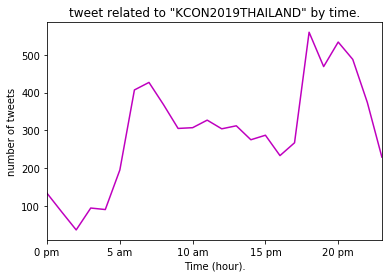

In [82]:
fig = plt.figure()
p = df.groupby('group').count()['time'].plot(color='m')
p.set_title('tweet related to "KCON2019THAILAND" by time.')
p.set_xlabel('Time (hour).')
p.set_ylabel('number of tweets')

Text(0, 0.5, 'number of tweets')

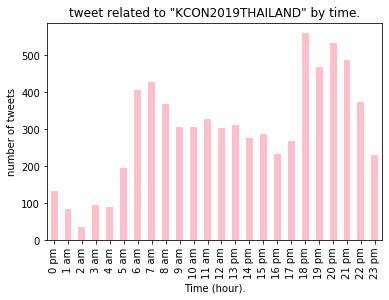

In [83]:
fig = plt.figure()
p = df.groupby('group').count()['time'].plot.bar(color='pink')
p.set_title('tweet related to "KCON2019THAILAND" by time.')
p.set_xlabel('Time (hour).')
p.set_ylabel('number of tweets')

## Top 5 language tweet about KCON2019THAILAND.

Text(0, 0.5, 'number of tweets')

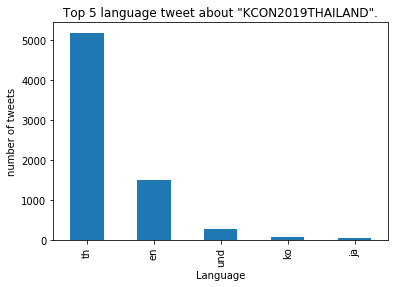

In [84]:
fig = plt.figure()
p = df['language'].value_counts()[:5].plot.bar()
p.set_title('Top 5 language tweet about "KCON2019THAILAND".')
p.set_xlabel('Language')
p.set_ylabel('number of tweets')

## Ranking artist from a hashtag that user tweet [ Raw data ]

Text(0, 0.5, 'number of hashtag')

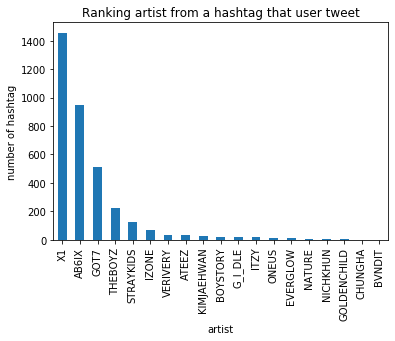

In [85]:
fig = plt.figure()
p = artist_df.sort_values(by=['hashtag_count'], ascending=False)['hashtag_count'].plot.bar()
p.set_title('Ranking artist from a hashtag that user tweet')
p.set_ylabel('number of hashtag')

## Ranking artist from a hashtag that user tweet [ Log nomalized ]

In [86]:
artist_df['lognorm'] = np.log10(1+artist_df['hashtag_count']) # create  hashtag count nomalized column

Text(0, 0.5, 'number of hashtag')

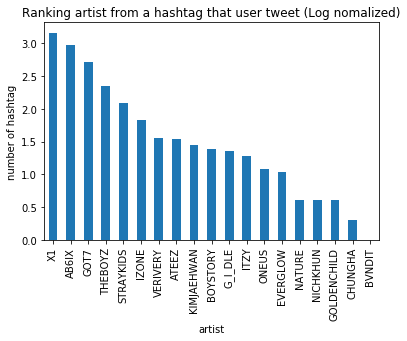

In [87]:
fig = plt.figure()
p = artist_df.sort_values(by=['lognorm'], ascending= False)['lognorm'].plot.bar()
p.set_title('Ranking artist from a hashtag that user tweet (Log nomalized)')
p.set_ylabel('number of hashtag')

## Tweets positive or negative

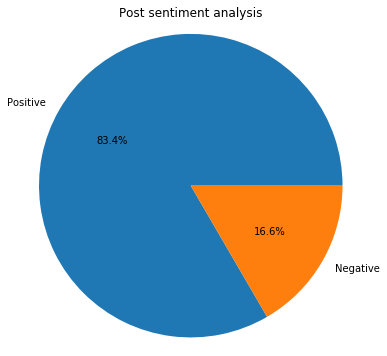

In [88]:
labels = ['Positive', 'Negative']
sizes = [pos_neg.count('positive'), pos_neg.count('negative')]
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
ax1.set_title('Post sentiment analysis')
plt.show()

In [89]:
pos_neg.count('positive')/len(pos_neg)

0.3827751196172249

In [90]:
pos_neg.count('negative')/len(pos_neg)

0.07627357162960878

In [91]:
pos_neg.count('other')/len(pos_neg)

0.5409513087531663

----------